<a href="https://www.kaggle.com/code/muhammadasifwazir/netflix-business-case-study-eda-using-python-02?scriptVersionId=196405515" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Netflix Business Case study - EDA using Python**

**Objectives of the Assignment**

- Perform EDA on the given dataset and find insights.

- Provide Useful Insights and Business recommendations that can help the business to grow.


# 1. IMPORTING LIBRIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOADING DATA

In [2]:
df=pd.read_csv(r'/kaggle/input/netflix-dataset/Netflix_dataset.csv')

# 3. BASIC OBSERVATIONS
- Shape of the dataset
- Checking few rows
- Count of the non-null values
- Unique values of each column
- Detailed description of numerical and categorical columns

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Only single column(release_Year) is having df numerical values.Rest all the columns are having categorical data.

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Total 8807 movies/TV shows data is provided in the dataset.

In [8]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

# 4. DATA CLEANING

**A. Overall null values in each column**

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

3 missing values are found in duration column

In [10]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [11]:
index = df[df['duration'].isna()].index

**B.	Impute null values using fillna() method**

In [12]:
df.loc[index] = df.loc[index].fillna(method = 'ffill' , axis = 1)

/tmp/ipykernel_17/301960796.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[index] = df.loc[index].fillna(method = 'ffill' , axis = 1)
/tmp/ipykernel_17/301960796.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2017 2010 2015]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index] = df.loc[index].fillna(method = 'ffill' , axis = 1)


**C. Replace the wrong entries in rating column**

In [13]:
df.loc[index ,'rating'] = 'Not Available'

In [14]:
df.loc[index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


Fill the null values in rating column

In [15]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [16]:
indices = df[df.rating.isna()].index
indices

Index([5989, 6827, 7312, 7537], dtype='int64')

In [17]:
df.loc[indices , 'rating'] = 'Not Available'

In [18]:
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [19]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In rating column , NR (Not rated) is same as UR (Unrated). lets change UR to NR.

In [20]:
df.loc[df['rating'] == 'UR' , 'rating'] = 'NR'
df.rating.value_counts()

rating
TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 83
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
Name: count, dtype: int64

**D.	Change the datatype of date_added column from object to datetime using pandas function to_datetime()**

dropped the null from date_added column

In [21]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)

In [22]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

For 'date_added' column, all values confirm to date format, So we can convert its data type from object to datetime

In [23]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
invalid_dates = df[df['date_added'].isna()]

In [24]:
#df['date_added'] = pd.to_datetime(df['date_added'])
#df['date_added']

We can add the new column 'year_added' by extracting the year from 'date_added' column

In [25]:
df['year_added'] = df['date_added'].dt.year

Similar way, We can add the new column 'month_added' by extracting the month from 'date_added' column

In [26]:
df['month_added'] = df['date_added'].dt.month

In [27]:
df[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


total null values in each column

In [28]:
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

% Null values in each column

In [29]:
round((df.isna().sum()/ df.shape[0])*100)

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
year_added       0.0
month_added      0.0
dtype: float64

We can see that, after cleaning some data we still have null values in 3 columns. 


**E. Check the types of content present in dataset (Hint unique values of type col)**

In [30]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [31]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show'] 

In [32]:
movies.duration.value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [33]:
tv_shows.duration.value_counts()

duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

# **Challenging Questions:**

- **The oldest and the most recent movie/TV show released on Netflix in which year?**

In [34]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

In [35]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,2021-04-28,2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane...",2021,4
967,s968,TV Show,Headspace Guide to Sleep,NaN,Evelyn Lewis Prieto,NaN,2021-04-28,2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...,2021,4
968,s969,TV Show,Sexify,NaN,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,2021-04-28,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...,2021,4
972,s973,TV Show,Fatma,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,2021-04-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea...",2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,s467,TV Show,My Unorthodox Life,NaN,NaN,NaN,2021-07-14,2021,TV-MA,1 Season,Reality TV,"Follow Julia Haart, Elite World Group CEO and ...",2021,7
467,s468,Movie,Private Network: Who Killed Manuel Buendía?,Manuel Alcalá,Daniel Giménez Cacho,NaN,2021-07-14,2021,TV-MA,100 min,"Documentaries, International Movies",A deep dive into the work of renowned Mexican ...,2021,7
468,s469,Movie,The Guide to the Perfect Family,Ricardo Trogi,"Louis Morissette, Émilie Bierre, Catherine Cha...",NaN,2021-07-14,2021,TV-MA,102 min,"Comedies, Dramas, International Movies","A couple in Québec deals with the pitfalls, pr...",2021,7
471,s472,Movie,Day of Destiny,"Akay Mason, Abosi Ogba","Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...",NaN,2021-07-13,2021,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...","With their family facing financial woes, two t...",2021,7


- **Which are the different ratings available on Netflix in each type of content (Movies/TV Show)? Check the number of contents released in each type.**

In [36]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 78
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

In [37]:
df['country'].value_counts()

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [38]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

/tmp/ipykernel_17/679330132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb.dropna(inplace = True)
/tmp/ipykernel_17/679330132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [39]:
country_tb['country'] = country_tb['country'].str.strip()

In [40]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [41]:
country_tb['country'].nunique()

123

so total movies from 123 countries

•	Total movies and tv shows directed by each director.

In [42]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

# Visual Analysis

1. **Distribution of content across the different types (Movies/TV Shows) using matplotlib pie chart**

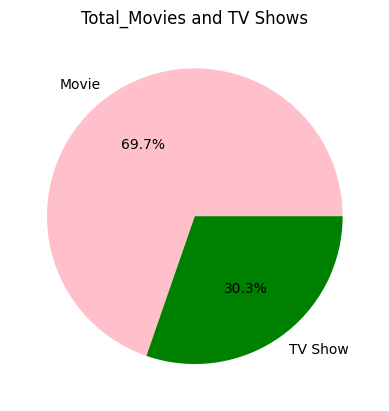

In [43]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['pink' , 'green'])
plt.title('Total_Movies and TV Shows')
plt.show()

2. **General visual analysis of null values in each column**

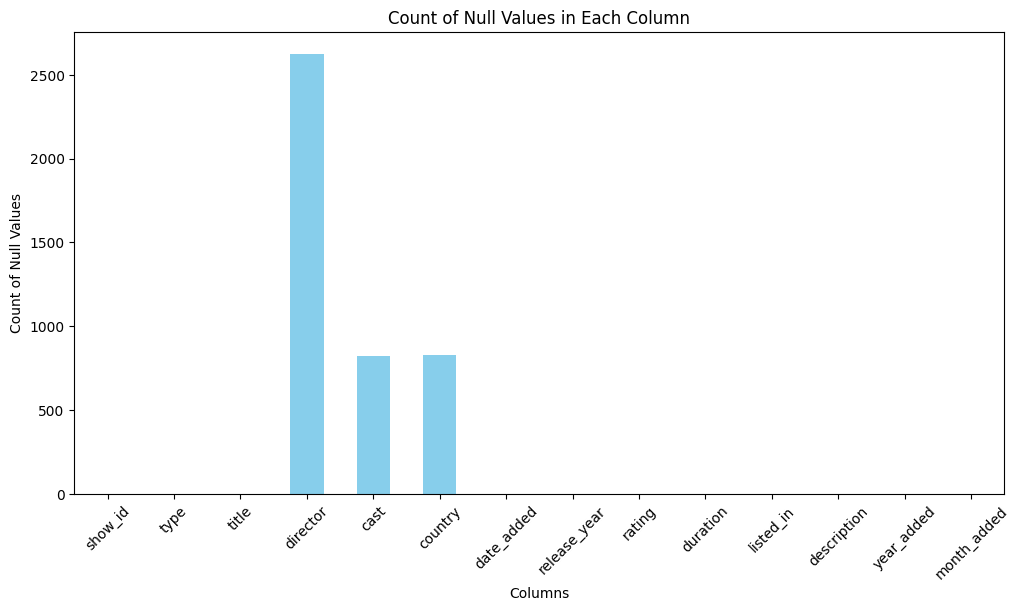

In [44]:
null_counts = df.isnull().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45)
plt.show()


3. **Seaborn box plot for each numeric column to identify any outliers.**

Numeric columns: Index(['year_added', 'month_added'], dtype='object')


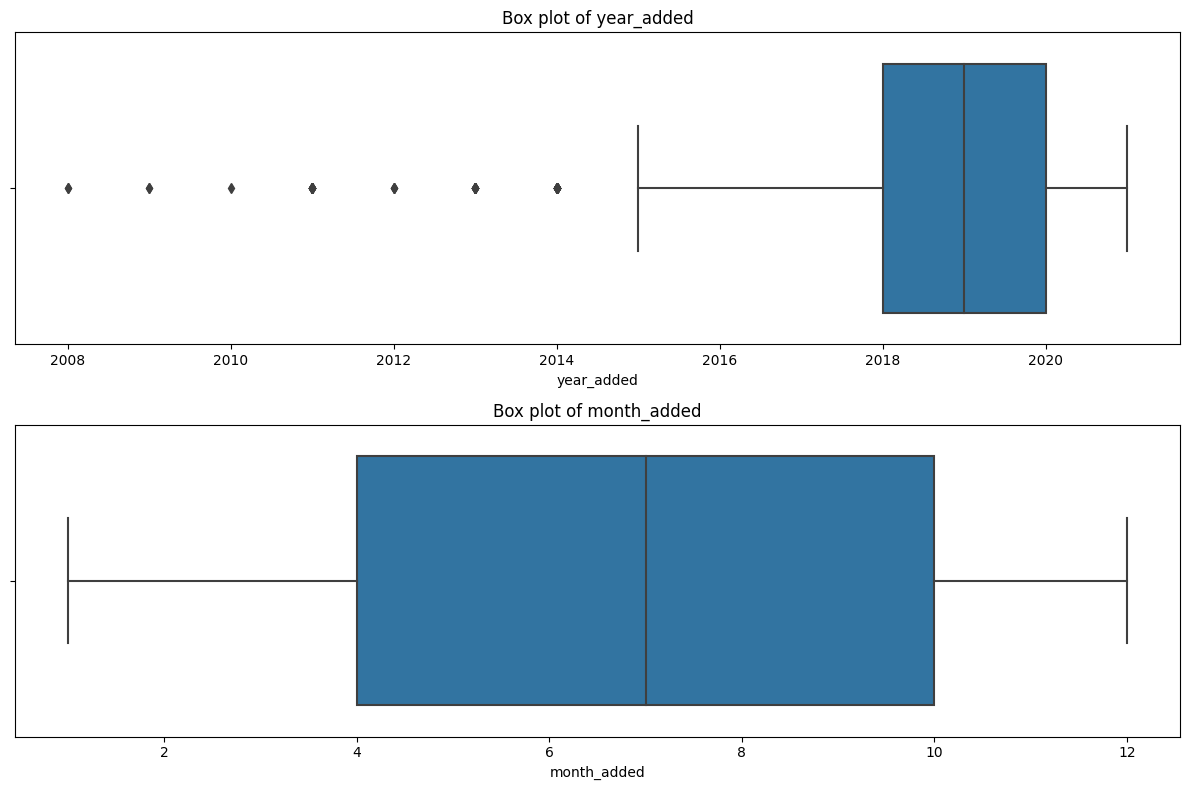

In [45]:

# Checking for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print(f"Numeric columns: {numeric_cols}")

# Plotting box plots for each numeric column
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


# Insights and Business Recommendations

Based on the exploratory data analysis performed on the Netflix dataset, here are some key insights and actionable business recommendations:

# Insights:

# Dataset Overview:



The dataset contains information about 8,807 movies and TV shows.
There is a single numeric column, release_year, with the rest being categorical.


**Missing Values:**

The duration column had 3 missing values which were imputed.
The rating column had missing values replaced with 'Not Available'.
The date_added column had some missing values which were dropped before converting the column to datetime format.


**Content Release Years:**

The oldest content on Netflix dates back to 1925.
The most recent content was released in 2021.


**Content Types:**

Netflix's catalog consists of two types of content: Movies and TV Shows.
Movies make up a larger proportion of the content compared to TV Shows.


**Ratings Distribution:**

Netflix offers a variety of ratings for its content, including 'TV-MA', 'TV-14', 'R', 'PG-13', 'NR', and 'Not Rated'.
'TV-MA' and 'TV-14' are the most common ratings for TV Shows, while 'R' and 'PG-13' are prevalent among movies.


**Country-wise Distribution:**

Content is available from 123 different countries, with the USA being the leading contributor.


**Director Contributions:**

Some directors have a higher number of contributions, with Michael Bay and Steven Spielberg among the notable ones.


**Null Values:**

Some columns still have null values even after initial cleaning. Specifically, cast, country, and director columns have significant missing values.


**Outliers:**

Box plots for the numeric column release_year reveal the presence of outliers. This could be due to old content being added to Netflix’s catalog, which is not necessarily a data quality issue but worth noting.




# Business Recommendations:


**Content Diversification:**

Continue to diversify the catalog by adding more international content to attract a global audience.
Focus on regions with fewer contributions to balance the content distribution.


**Director Collaborations:**

Engage with directors who have significantly contributed to popular content. Offering exclusive deals or collaborations with such directors can boost the platform's appeal.


**Improve Data Completeness:**

Address the missing values in key columns like cast, country, and director to enhance data quality.
Consider using advanced imputation techniques or gathering additional data to fill these gaps.


**Content Strategy:**

Use insights from release years and ratings distribution to guide future content acquisitions and productions. For example, there may be an opportunity to acquire or produce more content for underrepresented ratings.


**Targeted Marketing:**

Tailor marketing campaigns based on content type and ratings to different subscriber segments. For instance, highlight 'TV-MA' content to adult audiences while promoting 'PG-13' and 'TV-14' content to younger demographics.


**Focus on International Markets:**

Given the wide range of countries represented in the dataset, expanding marketing efforts and localization to these regions can help grow the subscriber base.


**Monitor and Manage Outliers:**

Regularly review outliers in the release_year data to ensure they are intentional additions to the catalog and not data entry errors.


**Enhance User Experience:**

Use the cleaned and enriched data to improve the recommendation algorithms, offering users a more personalized viewing experience based on their preferences and viewing history.











**By leveraging these insights and recommendations, Netflix can continue to grow its platform, enhance user satisfaction, and maintain its position as a leading media and video streaming service.**